# Linear advection equation with Discontinous Galerkin

## Notebook setup

In [1]:
import numpy
from matplotlib import pyplot
%matplotlib inline

## Important!

All codes used in this lesson are implemented in standard Python files ("__`py`__" extension). That is a project choice because it enables us to reuse code common to all lessons.

Loading external Python code into the notebook is simple: it suffices to use the "magic" __`%load`__:

> `%load my_super_duper_code.py`

You are completely free to adapt and modify the code so loaded, but keep in mind that any changes you make into the notebook are __not__ reflected back on the original Python files.

## Theoretical aspects and DG-FEM formulation

### The Model Equation

We consider the Linear Advection Equation (LAE) described by the following conservation law,

$$
\frac{\partial u(x,t)}{\partial t} +  \frac{\partial f(u(x,t))}{\partial x} = 0, \ x \in [L,R] = \Omega
$$

where $u(x,t)$ is the concentration of some transported species, $x \in \mathbb{R}$ and $t \in \mathbb{R}_{+}$ are the space and time coordinates, and $\Omega \subset \mathbb{R}$ is the problem domain, respectively. The typical flux function $f: \mathbb{R} \rightarrow \mathbb{R}$ used in this model can be written as

$$
f(u) = au
$$

where the constants $a$ stands for the transport speed.

This problem is subjected to appropriate initial condition

$$
u(x,0) = u_{0}(x).
$$

Boundary conditions are given when the boundary is an inflow boundary, i.e.,

$$
u(L,t) = g(t) \ \ \text{if} \ \ a \geq 0, \\
u(R,t) = g(t) \ \ \text{if} \ \ a \leq 0.
$$


### The Weak Local Statement

In order to obtain an approximation for the solution of the previous equation, we will rewrite the initial-boundary value problem in an integral form. For this, we assume that our integral form will be valid for each individual element of a given mesh and the global approximate solution will be enforced by some mechanism (which will be called numerical flux) that allows inter element communication through their boundaries.

Using this premise, for each element $\Omega^{k}$ of the mesh, we form the local residual as follows

\begin{equation}
	x \in \Omega^{k}: \mathcal{R}_{h}(x,t) = \frac{\partial u^{k}_{h}}{\partial t} + \frac{\partial au^{k}_{h}}{\partial x},
\end{equation}

where $u^{k}_{h}$ and $au^{k}_{h}$ are numerical approximations to the solution and the flux, respectively.

As in the Galerkin finite element formulation, we require that the residual is orthogonal to all test functions $\phi_{h}$ belonging to a finite dimension vector space $V_{h}$, leading to

\begin{equation}
	\int_{\Omega^{k}} \mathcal{R}_{h}(x,t)\phi^{k}_{i}(x) \: dx = 0,
\end{equation}

for all the elemental test functions $\phi^{k}_{i}(x)$.

Substituting the residual expression into the orthogonal relation yields 
\begin{equation}
	\int_{\Omega^{k}} \frac{\partial u^{k}_{h}}{\partial t}\phi^{k}_{i}(x) + \frac{\partial au^{k}_{h}}{\partial x}\phi^{k}_{i}(x) \: dx = 0.
\end{equation}

Integrating the second term of the latter equation by parts once gives us the weak local statement of the Linear Advection problem

\begin{equation}
	\int_{\Omega^{k}} \left(\frac{\partial u^{k}_{h}}{\partial t}\phi^{k}_{i}(x) - au^{k}_{h}\frac{d\phi^{k}_{i}}{dx}\right) \: dx = -\left[au^{k}_{h}\phi^{k}_{i}\right]^{x^{k}_{r}}_{x^{k}_{l}}.
\end{equation}

### Discontinuous Galerkin-FEM Discretization

We approximate $\Omega$ by $K$ nonoverlapping elements, $x \in [x^{k}_{l},x^{k}_{r}] = \Omega^{k}$ that we call a _finite element mesh_. On each of these elements we will assume that the local solution, $u^{k}_{h}(x,t)$, can be expressed as a polynomial of order $N$

\begin{align}
	x \in \Omega^{k}: \ u^{k}_{h}(x,t) &= \sum^{N+1}_{j=1}\hat{u}^{k}_{j}(t)\psi^{k}_{j}(x).
\end{align}

where $\psi^{k}_{j}(x)$ are the local basis functions which can be chosen as of the modal or nodal type. In this work we consider the Legendre polynomials, $P_{n}(\xi)$, defined on the reference interval $[-1,1]$, for the modal basis and the Lagrange polynomials, $\ell^{k}_{i}(x)$, defined through the $N_{p} = N+1$ Gauss-Legendre-Lobatto quadrature points, for the nodal case. These two basis functions representations are connected by the definition of the expansion coefficients, $\hat{u}_{i}$, as follows

$$
	{\cal V}\hat{\mathbb{u}} = \mathbb{u}
$$

where ${\cal V}_{ij} = P_{j-1}(\xi_{i})$, $\hat{\mathbb{u}}_{i} = \hat{u}_{i}$, $\mathbb{u}_{i} = u(\xi_{i})$. The matrix ${\cal V}$ is recognized as the generalized Vandermond matrix.

We now return to the weak form of the LAE and substitute the function $u$ by its discrete counterpart and replace the arbitrary test function $\phi^{k}_{i}$ by the piecewise polynomial functions $\psi^{k}_{i}(x) \in V_{h}$. We also introduce the numerical flux $(au_{h})^{*}$ in order to recover the global meaning of the discontinuous Galerkin (DG-FEM) approximate solution of the Linear Advection problem. Now, the semi-discrete form of the DG-FEM formulation can be written as

$$
\int_{\Omega^{k}} \left(\frac{\partial u^{k}_{h}}{\partial t} \psi^{k}_{i}(x) - au^{k}_{h} \frac{d\psi^{k}_{i}(x)}{dx}\right) dx = -\left[(au_{h})^{*}\psi^{k}_{i}(x)\right]^{x^{k}_{r}}_{x^{k}_{l}}, \ 1 \leq i \leq N+1.
$$

Substituting the expression for $u_h^k(x,t)$ into the last equation and using an affine transformation to perform integrations on the reference element $\hat{\Omega} = [-1,1]$, we can rewrite the semidiscrete DG-FEM weak formulation in its matrix form,

$$
\mathcal{M}^{k}\frac{d}{dt}\boldsymbol{\hat{u}}^{k}_{h} - \mathcal{S}^{T}a\boldsymbol{\hat{u}}^{k}_{h} = -(au_{h})^{*}\boldsymbol{\hat{\psi}}(\xi_{r})+(au_{h})^{*}\boldsymbol{\hat{\psi}}(\xi_{l}),
$$

where, for $1 \leq i,j \leq N+1$,

$$
\begin{align}
\mathcal{M}^{k} &= \frac{h^{k}}{2}\int_{\hat{\Omega}} \hat{\psi}_{i}\hat{\psi}_{j} \: d\xi, \\
\mathcal{S}^{T} &= \int_{\hat{\Omega}} \hat{\psi}_{i}\frac{d\hat{\psi}_{j}}{d\xi} \: d\xi,
\end{align}
$$

are the local mass and stiffness matrices, respectively. The term $h^{k}/{2}$ is the jacobian associated to the affine transformation and its value is half of the size of the $k$-th element, $\Omega^{k}$. Furthermore, we have

$$
\begin{align}
\boldsymbol{\hat{u}}^{k}_{h} &= [\hat{u}^{k}_{1},\ldots,\hat{u}^{k}_{N+1}]^{T}, \\
\boldsymbol{\hat{\psi}} &= [\hat{\psi}_{1}(\xi),\ldots,\hat{\psi}_{N+1}(\xi)]^{T}.
\end{align}
$$

as the vectors of local coefficients and local test functions, respectively.

Now, we are ready to define the numerical flux, $(au_{h})^{*}$, that appears in the equation above. We consider the following flux for the DG-FEM discretization

$$
f^{*} = (au_{h})^{*} = \{\{au_{h}\}\}+\left|a\right|\frac{1-\alpha}{2}[[u_{h}]], \ 0 \leq \alpha \leq 1
$$

where $\{\{.\}\}$ and $[[.]]$ are the average and jump operators usually defined as follows

$$
\{\{u\}\} = \frac{u^{-}+u^{+}}{2}
$$

where $u$ can be both a scalar or a vector quantity and

$$
\begin{align}
[[u]] &= \hat{\mathbf{n}}^{-}u^{-} + \hat{\mathbf{n}}^{+}u^{+}, \\
[[\mathbf{u}]] &= \hat{\mathbf{n}}^{-}\cdot\mathbf{u}^{-} + \hat{\mathbf{n}}^{+}\cdot\mathbf{u}^{+}.
\end{align}
$$

When the parameter $\alpha = 1$ the numerical flux is known as a central flux. For $\alpha = 0$, we recover a flux which always takes information from where it is coming, i.e., it is an upwind flux.

The quantity $\hat{\mathbf{n}}$ above is defined as the normal vector along the left or right boundaries of the $k$-th element. We observe that the jump operator is defined differently depending on whether $u$ is a scalar or a vector, $\mathbf{u}$. The superscripts "$-$" and "$+$" stand for the interior and exterior information of the element, respectively. 

To write the final semidiscrete form of the proposed DG-FEM scheme, we substitute the definition of the numerical flux into the right hand side of the equation in matricial form, as follows

$$
-(au_{h})^{*}\boldsymbol{\hat{\psi}}(\xi_{r})+(au_{h})^{*}\boldsymbol{\hat{\psi}}(\xi_{l}) =
$$

$$
\begin{align*}
&= \left[-\boldsymbol{\hat{\psi}}(1)\left(\{\{au_{h}\}\}+\left|a\right|\frac{1-\alpha}{2}[[u_{h}]]\right) + \boldsymbol{\hat{\psi}}(-1)\left(\{\{au_{h}\}\}+\left|a\right|\frac{1-\alpha}{2}[[u_{h}]]\right)\right] \\
&= \left[-\boldsymbol{\hat{\psi}}(1)\left(\frac{a}{2}(u^{-}_{h}+u^{+}_{h})+\left|a\right|\frac{1-\alpha}{2}(\hat{\mathbf{n}}^{-}_{r}u^{-}_{h} + \hat{\mathbf{n}}^{+}_{r}u^{+}_{h})\right)\right. \\
&+\left.\boldsymbol{\hat{\psi}}(-1)\left(\frac{a}{2}(u^{-}_{h}+u^{+}_{h})+\left|a\right|\frac{1-\alpha}{2}(\hat{\mathbf{n}}^{-}_{l}u^{-}_{h} + \hat{\mathbf{n}}^{+}_{l}u^{+}_{h})\right)\right]
\end{align*}
$$

where the subscripts $r$ or $l$ for the normal vector $\hat{\mathbf{n}}$ indicates that we are taking the normal vector at the right or left side of the $k$ element, respectively. We also notice that the local coordinates at the right and left boundaries of the reference element assume the values $\xi_{r} = 1$ and $\xi_{l} = -1$.

Substituting the expressions for the approximations $u^{k}_{h}$ into the equation above and remembering that $\hat{\mathbf{n}}^{-} = -\hat{\mathbf{n}}^{+}$ yields

$$
-(au_{h})^{*}\boldsymbol{\hat{\psi}}(\xi_{r})+(au_{h})^{*}\boldsymbol{\hat{\psi}}(\xi_{l}) =
$$

$$
\begin{align}
& \: \left[-\frac{a}{2}\boldsymbol{\hat{\psi}}(1)\left((\boldsymbol{\hat{u}}^{k}_{h})^{T}\boldsymbol{\hat{\psi}}(1)+(\boldsymbol{\hat{u}}^{k+1}_{h})^{T}\boldsymbol{\hat{\psi}}(-1)\right)\right. \\
&-\left|a\right|\frac{1-\alpha}{2}\hat{\mathbf{n}}^{-}_{r}\boldsymbol{\hat{\psi}}(1)\left((\boldsymbol{\hat{u}}^{k}_{h})^{T}\boldsymbol{\hat{\psi}}(1)-(\boldsymbol{\hat{u}}^{k+1}_{h})^{T}\boldsymbol{\hat{\psi}}(-1)\right) \\
&+\frac{a}{2}\boldsymbol{\hat{\psi}}(-1)\left((\boldsymbol{\hat{u}}^{k}_{h})^{T}\boldsymbol{\hat{\psi}}(-1)+(\boldsymbol{\hat{u}}^{k-1}_{h})^{T}\boldsymbol{\hat{\psi}}(1)\right) \\
&+\left.\left|a\right|\frac{1-\alpha}{2}\hat{\mathbf{n}}^{-}_{l}\boldsymbol{\hat{\psi}}(-1)\left((\boldsymbol{\hat{u}}^{k}_{h})^{T}\boldsymbol{\hat{\psi}}(-1)-(\boldsymbol{\hat{u}}^{k-1}_{h})^{T}\boldsymbol{\hat{\psi}}(1)\right)\right] \\
\\
=& \: \left[-\frac{a}{2}\left([\boldsymbol{\hat{\psi}}(1)\otimes\boldsymbol{\hat{\psi}}(1)]\: \boldsymbol{\hat{u}}^{k}_{h}+[\boldsymbol{\hat{\psi}}(1)\otimes\boldsymbol{\hat{\psi}}(-1)]\: \boldsymbol{\hat{u}}^{k+1}_{h}\right)\right.\\
&-\left|a\right|\frac{1-\alpha}{2}\hat{\mathbf{n}}^{-}_{r}\left([\boldsymbol{\hat{\psi}}(1)\otimes\boldsymbol{\hat{\psi}}(1)]\:\boldsymbol{\hat{u}}^{k}_{h}-[\boldsymbol{\hat{\psi}}(1)\otimes\boldsymbol{\hat{\psi}}(-1)]\:\boldsymbol{\hat{u}}^{k+1}_{h}\right) \\
&+\frac{a}{2}\left([\boldsymbol{\hat{\psi}}(-1)\otimes\boldsymbol{\hat{\psi}}(-1)]\:\boldsymbol{\hat{u}}^{k}_{h}+[\boldsymbol{\hat{\psi}}(-1)\otimes\boldsymbol{\hat{\psi}}(1)]\:\boldsymbol{\hat{u}}^{k-1}_{h}\right) \\
&+\left.\left|a\right|\frac{1-\alpha}{2}\hat{\mathbf{n}}^{-}_{l}\left([\boldsymbol{\hat{\psi}}(-1)\otimes\boldsymbol{\hat{\psi}}(-1)]\:\boldsymbol{\hat{u}}^{k}_{h}-[\boldsymbol{\hat{\psi}}(-1)\otimes\boldsymbol{\hat{\psi}}(1)]\:\boldsymbol{\hat{u}}^{k-1}_{h}\right)\right]
\end{align}
$$

Tensor multiplication of vectors of elemental test functions gives rise to matrices which we will call lift matrices. They are defined as follows

$$
\begin{align*}
\mathcal{F}^{k}_{r} &= [\hat{\boldsymbol{\psi}}(1)\otimes\hat{\boldsymbol{\psi}}(1)], \\
\mathcal{F}^{k+1}_{l} &= [\hat{\boldsymbol{\psi}}(1)\otimes\hat{\boldsymbol{\psi}}(-1)], \\
\mathcal{F}^{k}_{l} &= [\hat{\boldsymbol{\psi}}(-1)\otimes\hat{\boldsymbol{\psi}}(-1)], \\
\mathcal{F}^{k-1}_{r} &= [\hat{\boldsymbol{\psi}}(-1)\otimes\hat{\boldsymbol{\psi}}(1)].
\end{align*}
$$

Now we use the lift matrices definitions and rearrange terms to write the final matrix form of the right hand side 

$$
-(au_{h})^{*}\boldsymbol{\hat{\psi}}(\xi_{r})+(au_{h})^{*}\boldsymbol{\hat{\psi}}(\xi_{l}) = \:
$$

$$
\begin{align}
\left[-\frac{1}{2}\mathcal{F}^{k+1}_{l}\left(a\boldsymbol{\hat{u}}^{k+1}_{h}-\left|a\right|\left(1-\alpha\right)\hat{\mathbf{n}}^{-}_{r}\cdot \boldsymbol{\hat{u}}^{k+1}_{h}\right) \right. &- \frac{1}{2}\mathcal{F}^{k}_{r}\left(a\boldsymbol{\hat{u}}^{k}_{h}+\left|a\right|\left(1-\alpha\right)\hat{\mathbf{n}}^{-}_{r}\cdot \boldsymbol{\hat{u}}^{k}_{h}\right) \\
+\frac{1}{2}\mathcal{F}^{k-1}_{r}\left(a\boldsymbol{\hat{u}}^{k-1}_{h}-\left|a\right|\left(1-\alpha\right)\hat{\mathbf{n}}^{-}_{l}\cdot \boldsymbol{\hat{u}}^{k-1}_{h}\right) &+ \left.\frac{1}{2}\mathcal{F}^{k}_{l}\left(\boldsymbol{a\hat{u}}^{k}_{h}+\left|a\right|\left(1-\alpha\right)\hat{\mathbf{n}}^{-}_{l}\cdot \boldsymbol{\hat{u}}^{k}_{h}\right)\right].
\end{align}
$$

Noting that the exterior normal vector, $\hat{\mathbf{n}}^{-}$, assumes only two values, $\hat{\mathbf{n}}^{-}_{r} = 1$ and $\hat{\mathbf{n}}^{-}_{l} = -1$, at the right and the left boundaries, respectively, of any $k$ element , the semidiscrete form of the proposed DG scheme for the (LAE)can finally be written as

$$
\begin{align}
\frac{h^{k}}{2}\mathcal{M}\frac{d}{dt}\boldsymbol{\hat{u}}^{k}_{h} - \mathcal{S}^{T}a\boldsymbol{\hat{u}}^{k}_{h} = \: 
\left[-\frac{1}{2}\mathcal{F}^{k+1}_{l}\left(a\boldsymbol{\hat{u}}^{k+1}_{h}-\left|a\right|\left(1-\alpha\right)\boldsymbol{\hat{u}}^{k+1}_{h}\right) \right. &- \frac{1}{2}\mathcal{F}^{k}_{r}\left(a\boldsymbol{\hat{u}}^{k}_{h}+\left|a\right|\left(1-\alpha\right)\boldsymbol{\hat{u}}^{k}_{h}\right) \\
+\frac{1}{2}\mathcal{F}^{k-1}_{r}\left(a\boldsymbol{\hat{u}}^{k-1}_{h}+\left|a\right|\left(1-\alpha\right)\boldsymbol{\hat{u}}^{k-1}_{h}\right) &+ \left.\frac{1}{2}\mathcal{F}^{k}_{l}\left(a\boldsymbol{\hat{u}}^{k}_{h}-\left|a\right|\left(1-\alpha\right)\boldsymbol{\hat{u}}^{k}_{h}\right)\right].
\end{align}
$$

### Time Marching

The DG-FEM spatial discretization of the traffic flow equation produces a system of first order ODEs in terms of the traffic density field of the problem.  

Before discretizing the semidiscrete problem, we define the right hand side operator $\mathcal{L}_{h}$ for the variable $\boldsymbol{u}_{h}$ as

$$
\begin{align}
\mathcal{L}_{h}(\boldsymbol{u}_{h},t) = \frac{2}{h^{k}} \mathcal{M}^{-1} \left\{\mathcal{S}^{T}a\boldsymbol{\hat{u}}^{k}_{h} + \left[-\frac{1}{2}\right.\right.&\mathcal{F}^{k+1}_{l}\left(a\boldsymbol{\hat{u}}^{k+1}_{h}-\left|a\right|\left(1-\alpha\right)\boldsymbol{\hat{u}}^{k+1}_{h}\right) - \frac{1}{2}\mathcal{F}^{k}_{r}\left(a\boldsymbol{\hat{u}}^{k}_{h}+\left|a\right|\left(1-\alpha\right)\boldsymbol{\hat{u}}^{k}_{h}\right) \\
+\frac{1}{2} \: &\mathcal{F}^{k-1}_{r}\left(a\boldsymbol{\hat{u}}^{k-1}_{h}+\left|a\right|\left(1-\alpha\right)\boldsymbol{\hat{u}}^{k-1}_{h}\right) + \left.\left.\frac{1}{2}\mathcal{F}^{k}_{l}\left(a\boldsymbol{\hat{u}}^{k}_{h}-\left|a\right|\left(1-\alpha\right)\boldsymbol{\hat{u}}^{k}_{h}\right)\right]\right\}.
\end{align}
$$

To march this system of equations in time, we can use the classical and reliable forth order four stage explicit Runge-Kutta method (ERK)

$$
\begin{align}
&\boldsymbol{k}^{(1)} = \mathcal{L}_{h}(\boldsymbol{u}^{n}_{h},t^{n}), \\
&\boldsymbol{k}^{(2)} = \mathcal{L}_{h}\left(\boldsymbol{u}^{n}_{h}+\frac{1}{2}\mathit{\Delta} t\boldsymbol{k}^{(1)},t^{n}+\frac{1}{2}\mathit{\Delta} t\right), \\
&\boldsymbol{k}^{(3)} = \mathcal{L}_{h}\left(\boldsymbol{u}^{n}_{h}+\frac{1}{2}\mathit{\Delta} t\boldsymbol{k}^{(2)},t^{n}+\frac{1}{2}\mathit{\Delta} t\right),\\
&\boldsymbol{k}^{(4)} = \mathcal{L}_{h}\left(\boldsymbol{u}^{n}_{h}+\mathit{\Delta} t\boldsymbol{k}^{(3)},t^{n}+\mathit{\Delta} t\right), \\
&\boldsymbol{u}^{n+1}_{h} = \boldsymbol{u}^{n}_{h}+\frac{1}{6}\mathit{\Delta} t\left(\boldsymbol{k}^{(1)}+2\boldsymbol{k}^{(2)}+2\boldsymbol{k}^{(3)}+\boldsymbol{k}^{(4)}\right),
\end{align}
$$

to advance from $\boldsymbol{u}^{n}_{h}$ to $\boldsymbol{u}^{n+1}_{h}$ which are separated by the timestep, $\mathit{\Delta} t$. It is important to note that the ERK method is conditionally stable and requires the timestep size $\mathit{\Delta} t$ be estimated using the $CFL$ (Courant-Friedrichs-Lewy) condition. We define the CFL as

$$
CFL = \max_{k}\frac{c^{k}\mathit{\Delta} t}{\mathit{\Delta} x^{k}},
$$

where $c^{k}$ is the local propagation wave speed on element $k$ and $\mathit{\Delta} x^{k} = h^{k}$ is the local spatial grid resolution. The specific value of the $CFL$ (constant) number depends on the method used for the space and time discretizations but, in general, its order of magnitude is about 1. For the present case, we considered $CFL = 0.75$. As a last remark, we observe that, for high order methods such as the DG scheme described in this text, we have to consider the minimum grid space as the minimum distance between the mapped quadrature points (GL or GLL) on the mesh elements.

## Python implementation

### Simulation parameters

The first step to use the Python DG framework is the definition of the simulation parameters. There is a Python class specifically designed for this, called _SimulationData_, implemented on `simulation_data.py`. Also on the same file are two service classes, _QuadratureNodes_ and _BasisType_ used to represent minemonically the types of quadrature points and basis available in the framework.

#### QuadratureNodes
There are two variables defined in _QuadratureNodes_, both related to Gaussian integration:

- `QuadratureNodes.GL`, corresponding to the Legendre integration points, and
- `QuadratureNodes.GLL`, associated with the Legendre-Lobatto points.

#### BasisType
Here we have three variables:

- `BasisType.NODAL`, used to indicate we are using a nodal basis;
- `BasisType.MODAL`, the same as above, for modal basis, and
- `BasisType.MODAL_ORTHOGONAL`, for a special variation of the above.

> Remember to use `%load simulation_data.py` to bring the file to the notebook! Remember also to __run__ the cell!

In [2]:
# %load simulation_data.py
#
# Common simulation data
# ======================
# It presents a struct to store simulation data common to all problemas, like
# number of elements, polynomial order and so on.
#
# by Alberto Costa Nogueira Jr. (Matlab and Python versions)
#    Renato Cantao (Python version)
#
from math import ceil, floor

#
# Used to specify the chosen basis.
#
class BasisType(object):
    """The available basis types."""
    NODAL = 0
    MODAL = 1
    MODAL_ORTHOGONAL = 2

#
# Used to specify the chosen type of points distribution for Gaussian quadrature
#
class QuadratureNodes(object):
    """The available quadrature nodes distribution."""
    GL  = 0     # Gauss-Legendre
    GLL = 1     # Gauss-Legendre-Lobatto

class SimulationData:
    """Creates a simulation data structure."""
    def __init__(self,
                 n_elements      = 1,
                 poly_order      = 0,
                 spatial_domain  = (0.0, 1.0),
                 temporal_domain = (0.0, 1.0),
                 basis_type      = BasisType.NODAL,
                 node_dist       = QuadratureNodes.GL):
        """
        Parameters
        ----------
        n_elements
            Number of elements
        poly_order
            Polynomial order of approximation
        spatial_domain
            Spatial domain
        temporal_domain
            Temporal domain
        basis_type
            The basis used in the approximation
        node_dist
            The quadrature points distribution
        """
        self.n_elements      = n_elements
        self.poly_order      = poly_order
        self.spatial_domain  = spatial_domain
        self.temporal_domain = temporal_domain
        self.basis_type      = basis_type
        self.node_dist       = node_dist

    def mass_order(self):
        """Number of integration points needed for mass matrix assembly."""
        return self.poly_order*2

    def nonlinear_order(self):
        """Number of integration points needed for nonlinear terms."""
        return self.poly_order*3

    def spatial_domain_length(self):
        """Length of the spatial domain."""
        return self.spatial_domain[1] - self.spatial_domain[0]

    def n_local_dof(self):
        """Local degrees of freedom.
        
        In 1D we have the polynomial order plus 1, to account for the constant
        term."""
        return self.poly_order+1

    def n_global_dof(self):
        """Global degrees of freedom."""
        return self.n_local_dof()*self.n_elements

    def nip(self):
        if self.node_dist == QuadratureNodes.GL:
            return int(ceil(0.5*(self.mass_order()+2)))
        elif self.node_dist == QuadratureNodes.GLL:
            # floor(nip) will keep the nodal spectral approach Np = N+1
            return int(floor((self.mass_order()+3)/2))
        else:
            raise AssertionError( "Wrong quadrature node distribution!\n" )

    def t_min(self):
        return self.temporal_domain[0]

    def t_max(self):
        return self.temporal_domain[1]

    # Boilerplate code
    def __str__(self):
        return ("SimulationData:\n"
                "  Number of elements: %s\n"
                "  Polynomial order  : %s\n"
                "  Spatial domain    : %s\n"
                "  Temporal domain   : %s") % (self.n_elements,
                                               self.poly_order,
                                               self.spatial_domain,
                                               self.temporal_domain)

#-- simulation_data.py ---------------------------------------------------------


In [3]:
# - Elements: 10
# - Polynomial order: 8
# - Spatial domain: [0, 2]
# - Temporal domain: [0, 10]
# - Gaussian integration with Legendre-Lobatto points
# - Modal basis (orthonormal)
sim_data = SimulationData(n_elements=10, poly_order=8, spatial_domain=[0, 2],
                          temporal_domain=[0, 10], node_dist=QuadratureNodes.GLL,
                          basis_type=BasisType.MODAL)

### The finite element mesh

Given that we are on a 1D setting, a very simple mesh generator is easy to implement. Of course, on 2D or 3D we would resort to a third-party application. Note that the mesh is created based on the simulation data previously defined. The mesh is also responsible for evaluating the Jacobian.

The mesh class is _Mesh1D_, defined in `mesh_gen_1d.py`, consists -- at this point -- of two data members:

- `coord`, $x$ coordinate of every node on the mesh, and
- `conn`, connectivity matrix, associating elements and nodes

In [4]:
# %load mesh_gen_1d.py
# 
# 1D mesh generation
# ==================
# Generate simple equidistant grid with a given number of elements elements
#
# by Alberto Costa Nogueira Jr. (Matlab and Python versions)
#    Renato Cantao (Python version)
#
from simulation_data import SimulationData

class Mesh1D:
    """Simple one-dimensional mesh.
    
    Arguments:
        sim_data - SimulationData object
    """
    def __init__(self, sim_data):
        # Generate node coordinates
        # - Note that we have n_elements+1 points on the domain.
        # - The name 'coord' is classic in FEM codes.
        self.coord = numpy.linspace( sim_data.spatial_domain[0],
                                  sim_data.spatial_domain[1],
                                  sim_data.n_elements+1 )

        # Element to node connectivity
        # - The name 'conn' is classic in FEM codes.
        self.conn = numpy.array([numpy.arange(0, sim_data.n_elements, 1),
                              numpy.arange(1, sim_data.n_elements+1, 1)]).T

    def jacobian(self, sim_data, quad_data):
        nip = sim_data.nip()

        # The Jacobian
        self.J = 0.5*(self.coord[1:]-self.coord[0:-1])

        # Elements' mid-points
        B = 0.5*(self.coord[1:]+self.coord[0:-1])
        # We repeat and reshape the array. Why?
        B = numpy.repeat(B, nip).reshape(sim_data.n_elements, nip).T

        # The transformed points. The construct 'numpy.newaxis' is needed here
        # because we want a de facto matricial product (rank-1 update).
        #
        # x = xi^T * J
        self.x = quad_data.xi[numpy.newaxis].T.dot(self.J[numpy.newaxis]) + B

#-- mesh_gen_1d.py -------------------------------------------------------------


In [5]:
# Generate simple mesh
mesh = Mesh1D(sim_data)

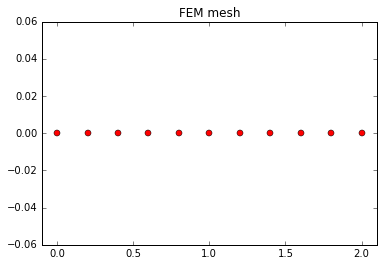

In [6]:
# Lets plot the mesh
pyplot.figure(1)
pyplot.clf()
pyplot.xlim(sim_data.spatial_domain[0]-0.1, sim_data.spatial_domain[1]+0.1)
pyplot.plot(mesh.coord, numpy.zeros(mesh.coord.shape), "ro")
pyplot.title("FEM mesh")
pyplot.show()

### Gaussian quadrature points and weights

Having defined the mesh, now we proceed with the creation of the Gaussian quadrature points and integration weights. For this purpose we can resort to the _JacobiGaussQuad_ class, defined in `jacobi_gauss_quad.py`. Objects of this class have two data members:

- `xi`, the integration points, and
- `w`, the integration weights

In [7]:
# %load jacobi_gauss_quad.py
#
# Points and weights for Gaussian quadrature
#
# by Alberto Costa Nogueira Jr. (Matlab and Python versions)
#    Renato Cantao (Python version)
#
import numpy
from math import gamma
from jacobi_p import jacobi_p
from djacobi_p import djacobi_p
from jacobi_roots import jacobi_roots
from simulation_data import QuadratureNodes

class JacobiGaussQuad:
    """Points and weights for Gaussian quadrature based on Jacobi polynomials"""
    def __init__(self, sim_data):
        # Sets parameters to obtain quadrature points from Legendre polynomials
        # Legendre == Jacobi(0,0)
        alpha = 0.0
        beta  = 0.0
        nip = sim_data.nip()

        # Case 1: Gauss-Legendre quadrature
        if sim_data.node_dist == QuadratureNodes.GL:
            self.xi, self.w = self._gl(nip, alpha, beta)
        # Case 2: Gauss-Legendre-Lobato quadrature
        elif sim_data.node_dist == QuadratureNodes.GLL:
            self.xi, self.w = self._gll(nip, alpha, beta)
        else:
            raise AssertionError("Unknown quadrature type!")

    # Case 1: Gauss-Legendre quadrature
    def _gl(self, nip, alpha, beta):
        xi = jacobi_roots(nip, alpha, beta)

        C1 = (2.0**(alpha+beta+1.0))*gamma(alpha+nip+1.0)*gamma(beta+nip+1.0)
        C2 = gamma(nip+1.0)*gamma(alpha+beta+nip+1.0)*(1.0-xi**2 )

        DPm = djacobi_p(xi, nip, alpha, beta)

        w = C1*DPm**(-2)/C2

        return xi, w

    # Case 2: Gauss-Legendre-Lobato quadrature
    def _gll(self, nip, alpha, beta):
        r = jacobi_roots(nip-2, alpha+1.0, beta+1.0)
        xi = numpy.empty(r.shape[0]+2)
        xi[0] = -1.0
        xi[1:-1] = r
        xi[-1] = 1.0

        C1 = (2.0**(alpha+beta+1.0))*gamma(alpha+nip)*gamma(beta+nip)
        C2 = (nip-1)*gamma(nip)*gamma(alpha+beta+nip+1.0)

        Pm = jacobi_p(xi, nip-1, alpha, beta)

        w = C1*Pm**(-2)/C2

        w[ 0] = w[ 0]*(beta+1.0)
        w[-1] = w[-1]*(alpha+1.0)

        return xi, w

    def n(self):
        """Number of integration points / weights."""
        return self.xi.shape[0]

#-- jacobi_gauss_quad.py -------------------------------------------------------


In [8]:
# Creating the quadrature points and weights
quad_data = JacobiGaussQuad(sim_data)

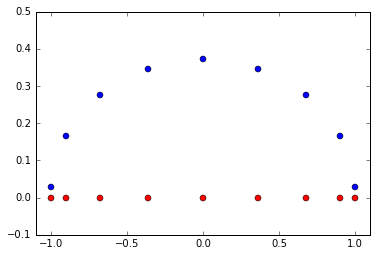

In [9]:
# Lets check the distribution of points and respective weights
pyplot.figure(2)
pyplot.clf()
pyplot.xlim(-1.1, 1.1)
pyplot.ylim(-0.1, 0.5)
pyplot.plot(quad_data.xi, quad_data.w, "bo")
pyplot.plot(quad_data.xi, numpy.zeros(quad_data.xi.shape), "ro")
pyplot.show()

### Basis functions

The _BasisFunctions_ class implements the three possible choices of basis functions (nodal, modal e modal-orthogonal) in a convenient matricial form accessible through the data member `psi`. Basis functions derivatives are also evaluated (data member `Dpsi`). Beyond the _BasisFunctions_ class itself, the file `basis_functions.py` brings the individual implementations of Lagrange, Legendre and Bubble functions.

In [10]:
# %load basis_functions.py
#
# Basis functions and respective derivatives
#
# by Alberto Costa Nogueira Jr. (Matlab and Python versions)
#    Renato Cantao (Python version)
#
import numpy
from sys import float_info
from math import fabs, sqrt
from jacobi_p import jacobi_p
from djacobi_p import djacobi_p, d_pq, d2_pq
from jacobi_roots import jacobi_roots
from simulation_data import QuadratureNodes, BasisType

def gll_nodes(n_local_dof):
    """Gauss-Legendre-Lobatto auxiliar points.
    
    Parameters
    ----------
    n_local_dof
        Per-element number of degrees of freedom
    """
    if n_local_dof < 2:
        raise AssertionError("Local degress of freedom must be >= 2!")

    # Setting GLL nodes
    alpha = 0.0
    beta  = 0.0

    xj = numpy.empty(n_local_dof)

    # GLL points are the roots of a Jacobi polynomial with alpha = beta = 1,
    # plus the interval extrema, -1 and 1.
    xj[0] = -1.0
    xj[1:-1] = jacobi_roots(n_local_dof-2, alpha+1.0, beta+1.0)
    xj[-1] = 1.0

    return xj

def lagrange(n_local_dof, xi, xj):
    """Lagrange basis function.

    Parameters
    ----------
    n_local_dof
        Number of local degrees of freedom
    xi
        Distribution of integration points on the element defining the
        Lagrangian basis
    xj
        Points where we evaluate the basis
    """
    # Number of Lagrange basis functions
    Q   = n_local_dof
    QQ1 = Q*(Q-1)

    # Number of evaluation points
    npts = xi.shape[0]

    # Allocates matrix to store Lagrange basis evaluated at npts points
    Hj = numpy.ones([npts, Q])
    Hj[:, 0] = ((-1.0)**(Q-1)/QQ1)*(xi-1.0)*(0.5*Q*jacobi_p(xi, Q-2, 1.0, 1.0))
    Hj[:,-1] = (1.0/QQ1)*(xi+1.0)*(0.5*Q*jacobi_p(xi, Q-2, 1.0, 1.0))
    
    Lp  =  jacobi_p(xj, Q-1, 0.0, 0.0)
    DLp = djacobi_p(xi, Q-1, 0.0, 0.0)

    for j in range(1, Q-1):   # from the second to the second-last column
        for i in range(0, npts):
            if fabs(xi[i]-xj[j]) > float_info.epsilon:
                Hj[i, j] = (xi[i]**2-1.0)*DLp[i]/(QQ1*Lp[j]*(xi[i]-xj[j]))

    return Hj

def bubble_basis(n_local_dof, xi):
    """Modal bubble functions.
    n_local_dof
        Number of local degrees of freedom
    xi
        Distribution of integration points on the element
    """
    # Number of bubble basis functions
    Q = n_local_dof

    # Number of evaluation points
    npts = xi.shape[0]

    # Allocates matrix to store Lagrange basis evaluated at npts points
    Bj = numpy.empty([npts, Q])
    
    # Boundary nodal basis functions (necessary to enforce C^(0) continuity)
    Bj[:, 0] = 0.5*(1.0-xi)
    Bj[:,-1] = 0.5*(1.0+xi)

    # Bubble modes
    for j in range(1, Q-1):
        Lj   = jacobi_p(xi, j+1, 0.0, 0.0)
        Ljm2 = jacobi_p(xi, j-1, 0.0, 0.0)
        Bj[:, j] = (Lj-Ljm2)/sqrt(2.0*(2.0*j+1.0))

    return Bj
    
def legendre_basis(n_local_dof, xi):
    """Legendre basis functions.
    n_local_dof
        Number of local degrees of freedom
    xi
        Distribution of integration points on the element
    """
    # Number of bubble basis functions
    Q = n_local_dof

    # Number of evaluation points
    npts = xi.shape[0]

    # Allocates matrix to store Lagrange basis evaluated at npts points
    Lj = numpy.empty([npts, Q])
    
    # Legendre basis
    for j in range(0, Q):
        Lj[:, j] = jacobi_p(xi, j, 0.0, 0.0)

    return Lj
    
class BasisFunctions:
    """Basis functions and derivatives on quadrature points."""
    def __init__(self, sim_data, gauss_quad):
        """
        Parameters
        ----------
        sim_data
            SimulationData object
        """
        n_local_dof = sim_data.n_local_dof()

        # Constructing the basis functions PHI
        if sim_data.basis_type == BasisType.NODAL:
            xj = gll_nodes(n_local_dof)
            self.psi = lagrange(n_local_dof, gauss_quad.xi, xj)
        elif sim_data.basis_type == BasisType.MODAL:
            self.psi = bubble_basis(n_local_dof, gauss_quad.xi)
        elif sim_data.basis_type == BasisType.MODAL_ORTHOGONAL:
            self.psi = legendre_basis(n_local_dof, gauss_quad.xi)
        else:
            raise AssertionError( "Wrong basis type!\n" )

        # Now we construct the derivative of the basis functions, DPHI/DX
        nip = sim_data.nip()

        self.D = numpy.zeros([nip, nip])

        dp  =  d_pq(gauss_quad.xi, nip, 0.0, 0.0, sim_data.node_dist)
        dp2 = d2_pq(gauss_quad.xi, nip, 0.0, 0.0, sim_data.node_dist)
    
        for i in range(0, nip):
            for j in range(0, nip):
                # Never do "ifs" inside loops! Just for pedagogic reasons.
                if i == j:
                    self.D[i, j] = dp2[i]/(2.0*dp[i])
                else:
                    dx = gauss_quad.xi[i] - gauss_quad.xi[j]
                    self.D[i, j] = dp[i]/(dp[j]*dx)

        self.dpsi = self.D.dot(self.psi)

#-- basis_functions.py ---------------------------------------------------------


In [11]:
# Basis functions and derivatives evaluated at quadrature points
basis = BasisFunctions(sim_data, quad_data)

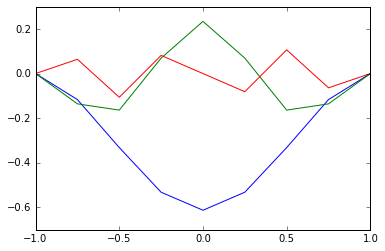

In [12]:
# We can also plot some of the functions
xp = numpy.linspace(-1.0, 1.0, basis.psi.shape[0])

pyplot.figure(3)
pyplot.clf()
pyplot.plot(xp, basis.psi[:,1].T)
pyplot.plot(xp, basis.psi[:,3].T)
pyplot.plot(xp, basis.psi[:,6].T)
pyplot.show()

> Can you explain why the graphics seem so sharp? After all, they are all polynomials...

### Jacobian

As we have seen in the theoretical part, there is a Jacobian involved in the numerical integration due to the transformation of all integrals from the real elements to the standard one. The Jacobian is evaluated by the same _Mesh1D_ class used before. After Jacobian evaluation two more data members become available:

- `J`, the Jacobian matrix, and
- `x`, a mapping of the integration points (remember, they are all in $[-1,1]$) to the real elements

> We don't need to load again `mesh_gen_1d.py`!

In [13]:
mesh.jacobian(sim_data, quad_data)

### Calculating $\Delta t$ and the number of time steps

In [14]:
# Calculates dt and number of time steps
xmin = numpy.fabs(mesh.x[0,:]-mesh.x[1,:]).min()
CFL = 0.75
dt = 0.5*CFL*xmin/numpy.pi
dt = 0.5*dt
Nsteps = ceil(sim_data.t_max()/dt)
dt = sim_data.t_max()/Nsteps

# Reduced number of steps to evaluate overall behaviour
Nsteps = 100

### Making room for the solution

We will record every step of the solution so we can make a movie showing the temporal evolution.

In [15]:
# We will store the solution at every time step, so we need to make room for it
u = numpy.zeros([sim_data.n_global_dof(), Nsteps+1])

### Preparing the initial condition

To make the framework flexible, we define a function `ic_function(x)` representing the initial condition. Change the function, and you automatically change the solution. Note that if we choose the `NODAL` basis the initial condition is simply copied over; otherwise it must be projected, or, in other words, written in terms of the basis functions.

> We need to load __two files__: `local_matrices.py` and `ic_projection.py`.

In [16]:
# %load local_matrices.py
# 
# Local mass and stiffness matrices
# =================================
#
# by Alberto Costa Nogueira Jr. (Matlab and Python versions)
#    Renato Cantao (Python version)
#
import numpy

def local_mass(quad_data, basis):
    """Constructs the elemental mass matrix

    Arguments:
        quad_data - Quadrature points and weights
        basis - Basis and respective derivatives

    Returns:
        Mass matrix M, where m_ij = \int_k psi_i psi_j
    """
    return numpy.dot(quad_data.w*basis.psi.T, basis.psi)

def local_mass_diagonal(quad_data, basis):
    """Constructs the elemental mass matrix, diagonal version

    Arguments:
        quad_data - Quadrature points and weights
        basis - Basis and respective derivatives

    Returns:
        Mass matrix M, where m_ii = \int_k psi_i psi_i
    """
    return numpy.sum(quad_data.w*basis.psi.T**2, axis=1)

def local_stiffness(quad_data, basis):
    """Constructs the elemental stiffness matrix

    Arguments:
        quad_data - Quadrature points and weights
        basis - Basis and respective derivatives

    Returns:
        Stiffness matrix S, where s_ij = \int_k psi_i Dpsi_j/dx
    """
    return numpy.dot(quad_data.w*basis.psi.T, basis.dpsi)

#-- local_matrices.py ----------------------------------------------------------


In [17]:
# %load ic_projection.py
# 
# Projection of initial condition
# ===============================
#
# by Alberto Costa Nogueira Jr. (Matlab and Python versions)
#    Renato Cantao (Python version)
#
import numpy

def ic_projection(quad_data, basis, fxi, M):
    """Projects the initial condition into polynomial space.

    Arguments:
        sim_data - SimulationData object
        quad_data - Quadrature points and weights
        basis - Basis and respective derivatives
        fxi - Function to be projected
        M - Elemental mass matrix
        is_diagonal - Hint to the solver. Diagonal matrices are much faster to
            solve

    Returns:
        Polynomial coefficients corresponding to fxi
    """
    return numpy.linalg.solve(M, numpy.dot(quad_data.w*basis.psi.T, fxi))


In [18]:
# Initial condition function
# 'x' can be a number, a list or any NumPy array
def ic_function(x):
    import numpy
    return numpy.sin(x)

# Projection of the initial condition onto the elements
phi = numpy.zeros(sim_data.n_global_dof())

if sim_data.basis_type == BasisType.NODAL:
    phi = ic_function(mesh.x.T.flat)
else:
    M = local_mass(quad_data, basis)
    for k in range(0, sim_data.n_elements):
        fproj = ic_projection(quad_data, basis, ic_function(mesh.x[:, k]), M)
        phi[sim_data.n_local_dof()*k:sim_data.n_local_dof()*(k+1)] = fproj

### Finally, the time iteration!

Load the `rk4.py` file and be happy!

> After __all__ this code, the solution process resumes to __four lines of code__!

In [19]:
# %load rk4.py
# 
# Runge-Kutta 4 steps method
# ==========================
#
# by Alberto Costa Nogueira Jr. (Matlab and Python versions)
#    Renato Cantao (Python version)
#
from simulation_data import BasisType
from eval_k import eval_k

def RK4(sim_data, quad_data, basis, mesh, tstep, t, dt, ic, u, phi):
    """Runge-Kutta 4 steps.

    Arguments:
        sim_data - SimulationData object
        quad_data - Quadrature points and weights
        basis - Basis and respectivederivatives
        mesh - 1D Finite Elements mesh
        tstep - present time step (integer)
        t - simulation time
        dt - delta t
        ic - initial condition function
        u - solution
        phi -

    Returns:
        A step of the RK4 method
    """
    ngdof = sim_data.n_global_dof()

    # RK4
    k1 = eval_k(sim_data, quad_data, basis, mesh, phi, ic, t)
    k2 = eval_k(sim_data, quad_data, basis, mesh, phi+0.5*dt*k1, ic, t)
    k3 = eval_k(sim_data, quad_data, basis, mesh, phi+0.5*dt*k2, ic, t)
    k4 = eval_k(sim_data, quad_data, basis, mesh, phi+dt*k3, ic, t)
    
    phi = phi+dt*(k1+2.0*k2+2.0*k3+k4)/6.0

    # Recovers displacement solution u for modal type basis
    if sim_data.basis_type == BasisType.NODAL:
        u[:, tstep] = phi[0:ngdof]
    else:
        nip = sim_data.nip()
        nldof = sim_data.n_local_dof()

        u_hat = phi[0:ngdof]

        for k in range(0, sim_data.n_elements):
            u[nip*k:nip*(k+1), tstep] = \
                u_hat[nldof*k:nldof*(k+1)].dot(basis.psi.T)

    return (u, phi)

#-- rk4.py ---------------------------------------------------------------------


In [20]:
# Time marching (RK4 time integrator)
t = sim_data.t_min()

for tstep in range(1, Nsteps+1):
    u, phi = RK4(sim_data, quad_data, basis, mesh, tstep, t, dt, ic_function, u, phi)
    t = t+dt

### Viewing the solution

If you have installed the _JSAnimation_ library you can generate a small movie showing the evolution of the solution along the time. If you get a message __`ImportError: No module named JSAnimation.IPython_display`__ do not dispair! We can still resort to _matplotlib_ to plot a few steps.

#### Creating a movie

In [25]:
from matplotlib import animation
from JSAnimation.IPython_display import display_animation

In [ ]:
# Lets do some movies!
# From https://jakevdp.github.io/blog/2012/08/18/matplotlib-animation-tutorial/

# First set up the figure, the axis, and the plot element we want to animate
fig = pyplot.figure(4)
ax = pyplot.axes(xlim=(sim_data.spatial_domain[0], sim_data.spatial_domain[1]),
            ylim=(numpy.min(u), numpy.max(u)))
ax.grid(True)
line, = ax.plot([], [], lw=2)

# Initialization function: plot the background of each frame
def init():
    line.set_data([], [])
    return line,

# Animation function.  This is called sequentially
def animate(i):
    global u, mesh
    x = mesh.x.T.flat
    y = u[:, i]
    line.set_data(x, y)
    return line,

# call the animator.  blit=True means only re-draw the parts that have changed.
anim = animation.FuncAnimation(fig, animate, init_func=init,
                               frames=Nsteps, interval=20, blit=True)

display_animation(anim, default_mode="once")

#### Plotting some steps of the solution

The solution `u` has `Nsteps` columns, precisely one for each time step. In order to view some is simple, as shown in the code below.

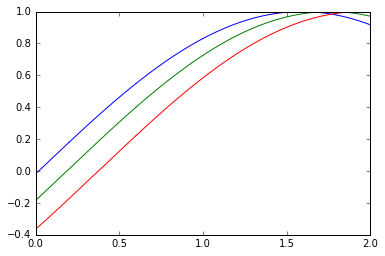

In [27]:
# Plotting a few samples of the solution along the time
pyplot.figure(5)
pyplot.clf()
x = mesh.x.T.flat
pyplot.plot(x, u[:,5])    # tstep = 5
pyplot.plot(x, u[:,50])   # tstep = 50
pyplot.plot(x, u[:,100])  # tstep = 100
pyplot.show()